In [130]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [131]:

import requests
import re
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Accediendo a los datos de manera remota

In [132]:

#Obteniendo los datos de la url
url_datos = 'https://github.com/cienciadedatos/datos-de-miercoles/raw/master/datos/2019/2019-04-10/partidos.txt'
#leyendo los datos y asignadolos a una variable
datos = pd.read_csv(url_datos, sep='\t')  
datos.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,(2),1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,(3),1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,(4),1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0


Crear dos gráficos en el que comparen a al menos dos países diferentes. Si quieren incluir a más países pueden hacerlo.
- Gráfico 1 deberá ser un gráfico en el que los datos de los países comparados aparezcan en el mismo cuadro
- Gráfico 2 deberá ser un gráfico en el que los datos de cada país aparezca en un subgráfico diferente. Es decir, una figura tenga al menos dos recuadros (uno por cada país en la comparación).

In [133]:
pais_1=datos[(datos.equipo_1 == 'Ecuador') ]
pais_1


,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
623,2002,Corea del sur y Japón,International Stadium Yokohama,Yokohama,(44),2002-06-13,Ecuador,Croacia,1,0
661,2006,Alemania,AOL Arena,Hamburg,(18),2006-06-15,Ecuador,Costa Rica,3,0
676,2006,Alemania,Olympiastadion,Berlin,(33),2006-06-20,Ecuador,Alemania,0,3
813,2014,Brasil,Estádio do Maracanã,Rio de Janeiro (UTC-3),(42),2014-06-25,Ecuador,Francia,0,0


In [134]:
pais_2=datos[(datos.equipo_1 == 'Colombia')]
pais_2

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
467,1994,Estados Unidos,Rose Bowl,Pasadena,(5),1994-06-18,Colombia,Rumania,1,3
546,1998,Francia,Stade de la Mosson,Montpellier,(31),1998-06-22,Colombia,Túnez,1,0
561,1998,Francia,Stade Félix Bollaert,Lens,(46),1998-06-26,Colombia,Inglaterra,0,2
776,2014,Brasil,Estádio Mineirão,Belo Horizonte (UTC-3),(5),2014-06-14,Colombia,Grecia,3,0
792,2014,Brasil,Estádio Nacional Mané Garrincha,Brasília (UTC-3),(21),2014-06-19,Colombia,Costa de Marfil,2,1
821,2014,Brasil,Estádio do Maracanã,Rio de Janeiro (UTC-3) # 1C - 2D,(50),2014-06-28,Colombia,Uruguay,2,0
851,2018,Rusia,Mordovia Arena,Saransk (UTC+3),(16),2018-06-19,Colombia,Japón,1,2
891,2018,Rusia,Spartak Stadium,Moscow (UTC+3),(56),2018-07-03,Colombia,Inglaterra,3,4


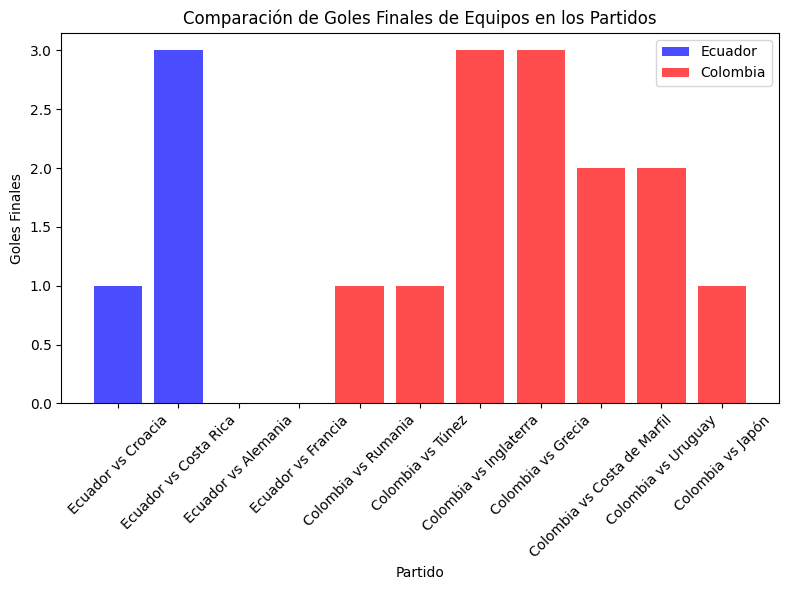

In [135]:
plt.figure(figsize=(8, 6))
plt.bar(pais_1['equipo_1'] + " vs " + pais_1['equipo_2'], pais_1['equipo_1_final'], label='Ecuador', color='blue', alpha=0.7)
plt.bar(pais_2['equipo_1'] + " vs " + pais_2['equipo_2'], pais_2['equipo_1_final'], label='Colombia', color='red', alpha=0.7)
plt.xlabel('Partido')
plt.ylabel('Goles Finales')
plt.title('Comparación de Goles Finales de Equipos en los Partidos')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

Vamos a mostrar que pais ha estado en mas mundiales

In [136]:
suma_pais_1 = pais_1['equipo_1'].count()
suma_pais_1

4

In [137]:
suma_pais_2 = pais_2['equipo_1'].count()
suma_pais_2

8

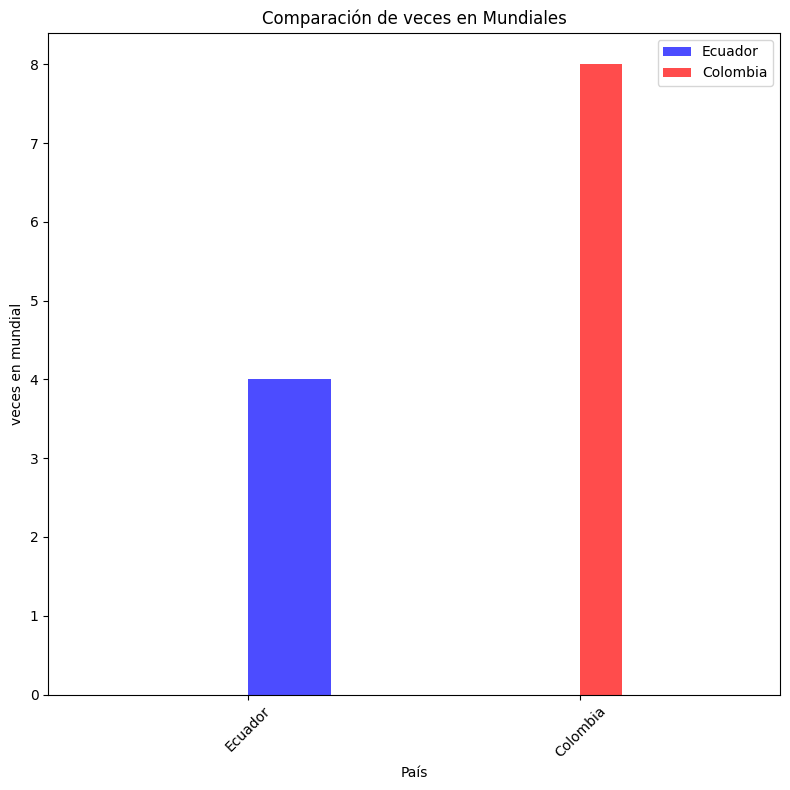

In [138]:
plt.figure(figsize=(8, 8))
plt.hist(pais_1.equipo_1,suma_pais_1, label='Ecuador', color='blue', alpha=0.7)
plt.hist(pais_2.equipo_1,suma_pais_2, label='Colombia', color='red', alpha=0.7)
plt.xlabel('País')
plt.ylabel('veces en mundial')
plt.title('Comparación de veces en Mundiales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

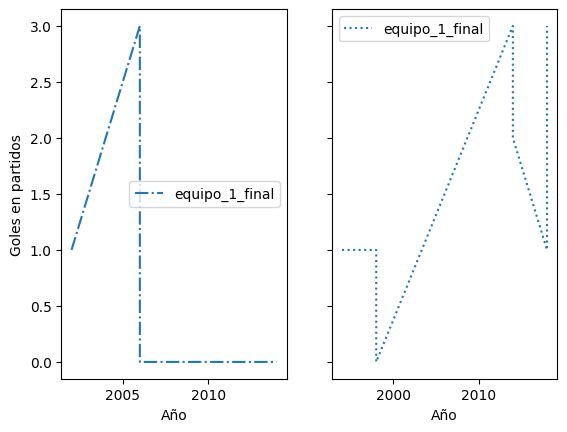

In [141]:
fig = plt.figure()
#Agregamos un eje (1 fila, 2 columnas, primer eje)
eje = fig.add_subplot(1, 2, 1)
#Graficamos los datos de Chile en el primer eje
pais_1.plot(x = 'anio', y = 'equipo_1_final', ax = eje, ls = '-.')

eje2 = fig.add_subplot(1, 2, 2, sharey = eje)
#Graficamos los datos de Ecuador en el segundo eje
pais_2.plot(x = 'anio', y = 'equipo_1_final', ax = eje2, ls = 'dotted')
#Agregamos etiquetas a los ejes
eje.set_xlabel('Año')
eje2.set_xlabel('Año')
eje.set_ylabel('Goles en partidos')
plt.savefig('Goles.png')

Guardar el gráfico anterior

<Figure size 640x480 with 0 Axes>